# Overview
Simplifies and converts data to urdf.  
Note that the notebook initially was in the data folder, so copy it or fix paths laters.

In [1]:
from pathlib import Path
import re, fileinput

ROOT = Path('../assets/simplified_objects')

for mtl in ROOT.rglob('*.mtl'):
    lines, changed = [], False
    for ln in mtl.read_text().splitlines(keepends=False):
        if re.match(r'\s*Kd\s+0\.0+\s+0\.0+\s+0\.0+\s*$', ln, re.I):
            ln = 'Kd 1.000000 1.000000 1.000000'   # or comment it out
            changed = True
        lines.append(ln)
    if changed:
        mtl.write_text('\n'.join(lines) + '\n')
        print('patched', mtl.relative_to(ROOT))

patched 025/textured.obj.mtl
patched 025/textured_simplified.obj.mtl
patched 021/textured.obj.mtl
patched 021/textured_simplified.obj.mtl
patched 016/textured.obj.mtl
patched 016/textured_simplified.obj.mtl
patched 017/textured.obj.mtl
patched 017/textured_simplified.obj.mtl
patched 015/textured.obj.mtl
patched 015/textured_simplified.obj.mtl
patched 011/textured.obj.mtl
patched 011/textured_simplified.obj.mtl
patched 019/textured.obj.mtl
patched 019/textured_simplified.obj.mtl
patched 013/textured.obj.mtl
patched 013/textured_simplified.obj.mtl


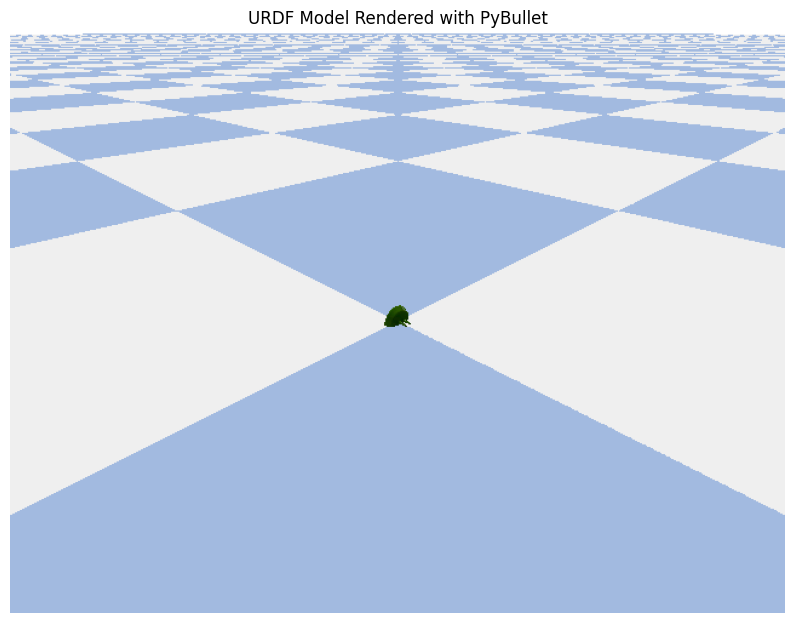

In [8]:
import pybullet as p
import pybullet_data
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

# Start PyBullet in DIRECT mode (no GUI)
physicsClient = p.connect(p.DIRECT)

# Set up the search path for PyBullet data
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# Load a plane and a URDF file (you can replace with your own URDF path)
planeId = p.loadURDF("plane.urdf")
# Replace with your URDF file path
urdfId = p.loadURDF("../assets/simplified_objects/072.urdf", [0, 0, 0])

# Set up camera parameters
width, height = 640, 480
fov = 60
aspect = width / height
near = 0.1
far = 100

# Camera position and orientation
camera_distance = 1
camera_yaw = 45
camera_pitch = -30
camera_target = [0, 0, 0]

# Render the scene
view_matrix = p.computeViewMatrixFromYawPitchRoll(
    camera_target, camera_distance, camera_yaw, camera_pitch, 0, 2)
proj_matrix = p.computeProjectionMatrixFOV(fov, aspect, near, far)

# Capture image
img = p.getCameraImage(width, height, view_matrix, proj_matrix, renderer=p.ER_BULLET_HARDWARE_OPENGL)

# Convert to numpy array and display
rgb_array = np.array(img[2]).reshape(height, width, 4)[:, :, :3]  # Remove alpha channel
plt.figure(figsize=(10, 8))
plt.imshow(rgb_array)
plt.axis('off')
plt.title('URDF Model Rendered with PyBullet')
plt.show()

# Disconnect from PyBullet
p.disconnect()